In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install SALib
from SALib.sample import morris as morris_sample
from SALib.analyze import morris as morris_analyze
import statsmodels.api as sm

df = pd.read_csv("combined_results_snellius.csv")

#Show first lines
df.head()


,run_id,temperature,rationality,consensus_reached,rounds_to_consensus,final_leading_margin,polarisation_start,polarisation_peak,polarisation_final,max_gridlock_span,gridlock_end_round,mean_switches_per_agent,run_outcome,winner_name
0,temp_0_50_rat_0_75_13_run_13_spoulain,0.5,0.75,True,4,18,0.001420,0.002523,0.002149,0,NaN,61.0,CONSENSUS,Luis Antonio Gokim Tagle
1,temp_0_50_rat_0_75_20_run_17_kverlaan,0.5,0.75,True,9,16,0.001541,0.002256,0.002256,0,NaN,72.0,CONSENSUS,Luis Antonio Gokim Tagle
2,temp_0_50_rat_0_75_37_run_5_mbelkhatir,0.5,0.75,True,25,18,0.004202,0.004202,0.002543,0,NaN,97.0,CONSENSUS,Luis Antonio Gokim Tagle
3,temp_0_50_rat_0_75_22_run_19_kverlaan,0.5,0.75,True,6,16,0.001319,0.003169,0.003069,0,NaN,60.0,CONSENSUS,Luis Antonio Gokim Tagle
4,temp_0_50_rat_0_75_51_run_9_kverlaan,0.5,0.75,True,13,19,0.001788,0.004354,0.004354,0,NaN,76.0,CONSENSUS,Luis Antonio Gokim Tagle


OFAT : LOCAL ANALYSIS. 

We start witht temperature first, with rationality fixed. We analyse for every output( mean number of rounds, winner distributions, proportion of final vote treshold met)

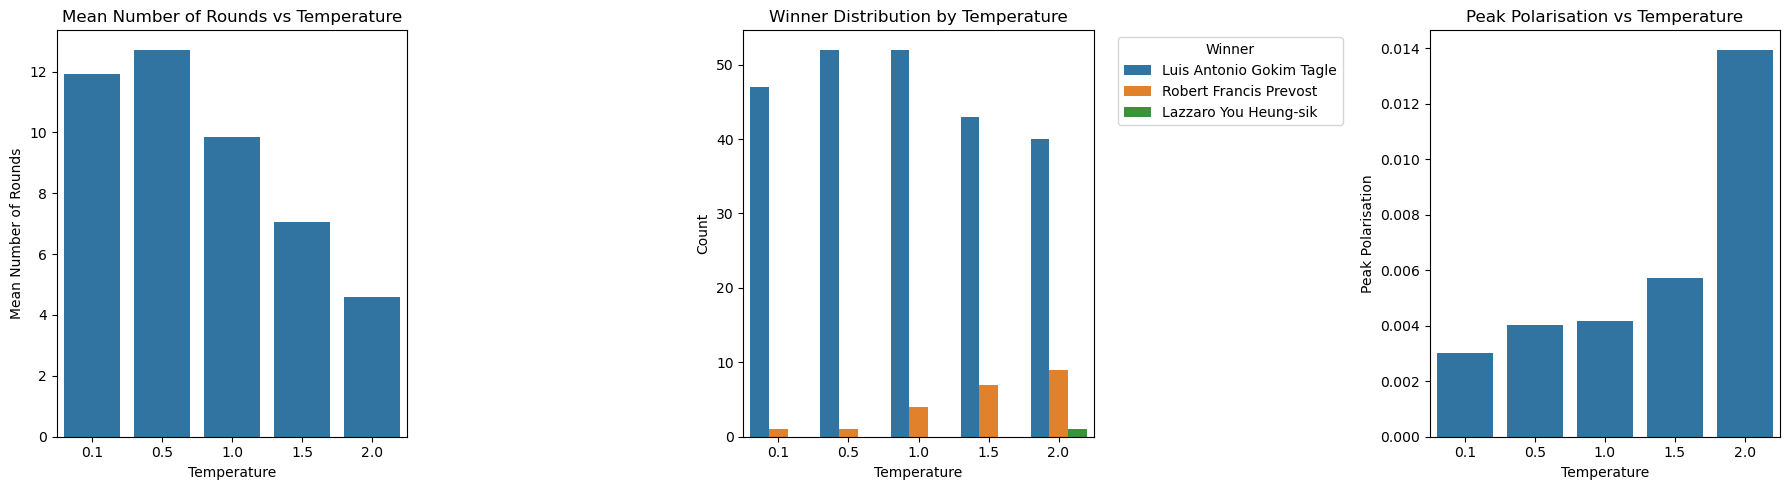

In [71]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Mean number of rounds vs temperature
mean_rounds = df_fixed.groupby('temperature')['rounds_to_consensus'].mean().reset_index()
sns.barplot(x='temperature', y='rounds_to_consensus', data=mean_rounds, ax=axes[0])
axes[0].set_title('Mean Number of Rounds vs Temperature')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Mean Number of Rounds')

# Plot 2: Winner distribution by temperature
sns.countplot(x='temperature', hue='winner_name', data=df_fixed, ax=axes[1])
axes[1].set_title('Winner Distribution by Temperature')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Count')
axes[1].legend(title='Winner', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Peak polarisation vs temperature
mean_polarisation = df_fixed.groupby('temperature')['polarisation_peak'].mean().reset_index()
sns.barplot(x='temperature', y='polarisation_peak', data=mean_polarisation, ax=axes[2])
axes[2].set_title('Peak Polarisation vs Temperature')
axes[2].set_xlabel('Temperature')
axes[2].set_ylabel('Peak Polarisation')

plt.tight_layout()
plt.savefig("OFAT.png")
plt.show()


Now, we fix temperature, and vary rationality. 

In [19]:
# Choose the value of temperature to fix
default_temperature = 0.5

# Filter the DataFrame for the fixed temperature value
df_fixed = df[df['temperature'] == default_temperature]

print(f"OFAT analysis for rationality (temperature fixed at {default_temperature})\n")

for rat in sorted(df_fixed['rationality'].unique()):
    subset = df_fixed[df_fixed['rationality'] == rat]
    print(f"Rationality = {rat}")
    print(f"  Mean number of rounds: {subset['rounds_to_consensus'].mean():.2f}")
    print(f"  Winner distribution:")
    print(subset['winner_name'].value_counts())
    print(f"  Proportion of consensus_reached (True): {subset['consensus_reached'].mean():.2%}")
    print("-" * 40)

OFAT analysis for rationality (temperature fixed at 0.5)

Rationality = 0.0
  Mean number of rounds: 12.19
  Winner distribution:
winner_name
Luis Antonio Gokim Tagle    50
Robert Francis Prevost       4
Name: count, dtype: int64
  Proportion of consensus_reached (True): 100.00%
----------------------------------------
Rationality = 0.25
  Mean number of rounds: 8.96
  Winner distribution:
winner_name
Luis Antonio Gokim Tagle    49
Robert Francis Prevost       1
Name: count, dtype: int64
  Proportion of consensus_reached (True): 100.00%
----------------------------------------
Rationality = 0.5
  Mean number of rounds: 11.08
  Winner distribution:
winner_name
Luis Antonio Gokim Tagle    49
Robert Francis Prevost       2
Name: count, dtype: int64
  Proportion of consensus_reached (True): 100.00%
----------------------------------------
Rationality = 0.75
  Mean number of rounds: 12.72
  Winner distribution:
winner_name
Luis Antonio Gokim Tagle    52
Robert Francis Prevost       1
Name: 

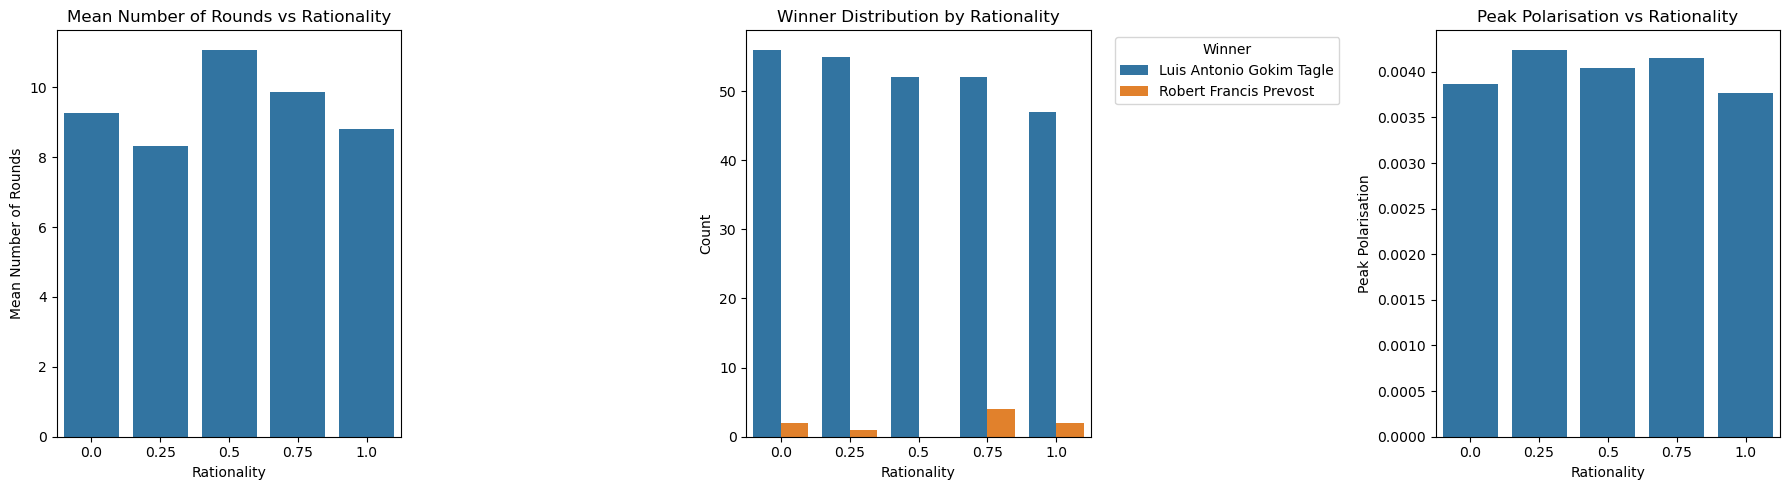

In [73]:
import matplotlib.pyplot as plt

# Fix temperature at its median value
reference_temperature = df['temperature'].median()
df_fixed_rationality = df[df['temperature'] == reference_temperature]

# Create the three plots: mean number of rounds, winner distribution, and peak polarisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Mean number of rounds vs rationality
mean_rounds_rat = df_fixed_rationality.groupby('rationality')['rounds_to_consensus'].mean().reset_index()
sns.barplot(x='rationality', y='rounds_to_consensus', data=mean_rounds_rat, ax=axes[0])
axes[0].set_title('Mean Number of Rounds vs Rationality')
axes[0].set_xlabel('Rationality')
axes[0].set_ylabel('Mean Number of Rounds')

# Plot 2: Winner distribution by rationality
sns.countplot(x='rationality', hue='winner_name', data=df_fixed_rationality, ax=axes[1])
axes[1].set_title('Winner Distribution by Rationality')
axes[1].set_xlabel('Rationality')
axes[1].set_ylabel('Count')
axes[1].legend(title='Winner', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Peak polarisation vs rationality
mean_polarisation_rat = df_fixed_rationality.groupby('rationality')['polarisation_peak'].mean().reset_index()
sns.barplot(x='rationality', y='polarisation_peak', data=mean_polarisation_rat, ax=axes[2])
axes[2].set_title('Peak Polarisation vs Rationality')
axes[2].set_xlabel('Rationality')
axes[2].set_ylabel('Peak Polarisation')

plt.tight_layout()
plt.savefig("OFAT_rationality.png", dpi=300)
plt.show()


Now that we have checked distributions, and now where are the 

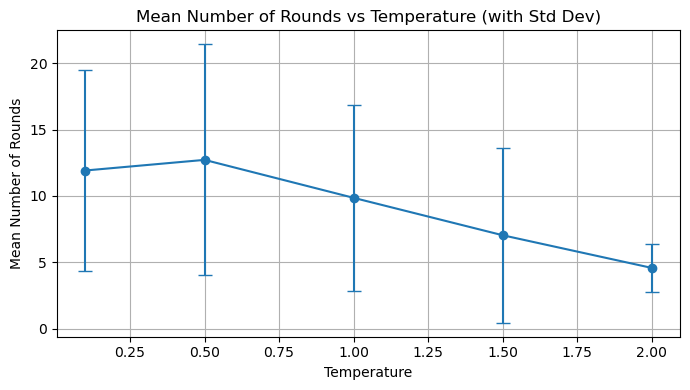

In [23]:
default_rationality = 0.75
df_fixed = df[df['rationality'] == default_rationality]

# Calculate mean and standard deviation
stats = df_fixed.groupby('temperature')['rounds_to_consensus'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(7, 4))
plt.errorbar(stats['temperature'], stats['mean'], yerr=stats['std'], fmt='-o', capsize=5)
plt.title('Mean Number of Rounds vs Temperature (with Std Dev)')
plt.xlabel('Temperature')
plt.ylabel('Mean Number of Rounds')
plt.grid(True)
plt.tight_layout()
plt.show()

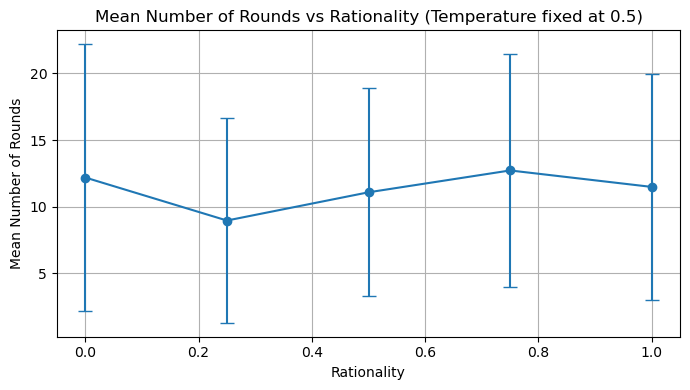

In [25]:
# Fix the temperature value
fixed_temperature = 0.50
df_fixed = df[df['temperature'] == fixed_temperature]

# Calculate mean and standard deviation of rounds for each rationality
stats = df_fixed.groupby('rationality')['rounds_to_consensus'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(7, 4))
plt.errorbar(stats['rationality'], stats['mean'], yerr=stats['std'], fmt='-o', capsize=5)
plt.title(f'Mean Number of Rounds vs Rationality (Temperature fixed at {fixed_temperature})')
plt.xlabel('Rationality')
plt.ylabel('Mean Number of Rounds')
plt.grid(True)
plt.tight_layout()
plt.show()

Okay, now we know from lectures that OFAT isn't the best local sensitivity analysis method when you have multiple parameters that influence each other, because OFAT doesn't take into account these interactions. Let's move on to other methods we saw in classes, that are global methods. 

The elementary Effect method: Morris application

                   mu   mu_star     sigma  mu_star_conf
temperature -8.643193  8.643193  1.775123      0.515593
rationality  0.167084  1.005317  1.462853      0.297676


C:\Users\dj\anaconda3\Lib\site-packages\SALib\sample\morris\morris.py:372: UserWarning: num_levels should be an even number, sample may be biased
  warnings.warn("num_levels should be an even number, " "sample may be biased")


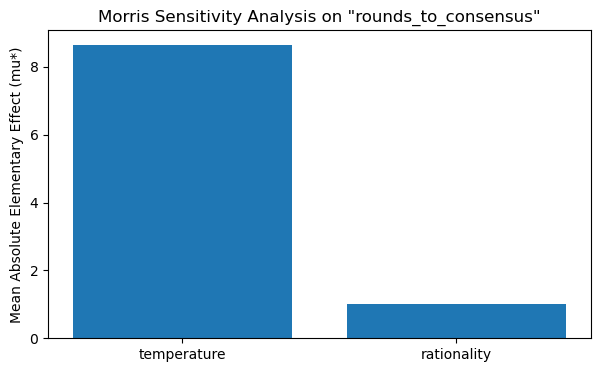

In [28]:
# List all valid discrete values
temperature_values = sorted(df['temperature'].unique())
rationality_values = sorted(df['rationality'].unique())

# Define the problem for SALib
problem = {
    'num_vars': 2,
    'names': ['temperature', 'rationality'],
    'bounds': [
        [min(temperature_values), max(temperature_values)],
        [min(rationality_values), max(rationality_values)],
    ]
}

# Generate Morris samples (in continuous space)
N = 50  # Number of trajectories (increase for more robust results)
num_levels = max(len(temperature_values), len(rationality_values))
param_values = morris_sample.sample(problem, N, num_levels=num_levels, optimal_trajectories=None)

# Map the continuous samples to the nearest allowed discrete value
def closest(x, val_list):
    return min(val_list, key=lambda v: abs(v - x))

mapped_samples = []
for temp, rat in param_values:
    mapped_temp = closest(temp, temperature_values)
    mapped_rat = closest(rat, rationality_values)
    mapped_samples.append([mapped_temp, mapped_rat])
mapped_samples = np.array(mapped_samples)

# Evaluate the model (get output for each sampled parameter set)
# Here, output is the mean number of rounds_to_consensus for each parameter set
def get_output(temp, rat):
    subset = df[(df['temperature'] == temp) & (df['rationality'] == rat)]
    if not subset.empty:
        return subset['rounds_to_consensus'].mean()
    else:
        return np.nan

Y = np.array([get_output(temp, rat) for temp, rat in mapped_samples])

# Remove NaNs (if any combinations are not present in your data)
valid = ~np.isnan(Y)
Y = Y[valid]
mapped_samples = mapped_samples[valid]

# Morris analysis
Si = morris_analyze.analyze(problem, mapped_samples, Y, conf_level=0.95, print_to_console=True)

# Plot the results
plt.figure(figsize=(7,4))
plt.bar(problem['names'], Si['mu_star'])
plt.ylabel('Mean Absolute Elementary Effect (mu*)')
plt.title('Morris Sensitivity Analysis on "rounds_to_consensus"')
plt.show()

The value of mu* (mu_star) for temperature is very high, indicating that this parameter has a strong influence on the output. Rationality also shows a high mu*, meaning it is influential as well, although less so than rationality. This confirms that our choice to focus on these two parameters was appropriate, allowing us to fix the more technical ones.

Both parameters also have high sigma values. This suggests the presence of non-linear effects or interactions between parameters. However, as discussed in the lectures, the Morris method alone does not allow us to fully disentangle the nature of these effects; it only signals their possible presce. I I picked 50 trajectories to have a good equilibrium between computation cost and stability. e.

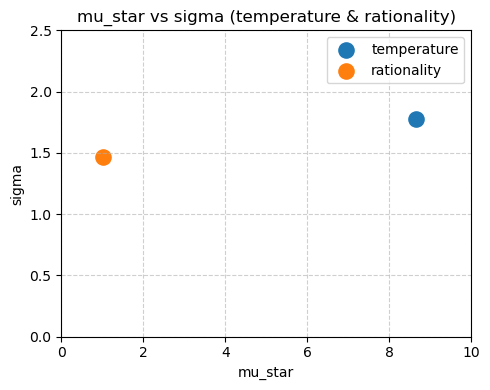

In [31]:
params = ['temperature', 'rationality']
mu_star = [8.643193, 1.005317]
sigma = [1.775123, 1.462853]
colors = ['tab:blue', 'tab:orange']

plt.figure(figsize=(5, 4))
for i, param in enumerate(params):
    plt.scatter(mu_star[i], sigma[i], color=colors[i], s=120, label=param)

plt.title('mu_star vs sigma (temperature & rationality)')
plt.xlabel('mu_star')
plt.ylabel('sigma')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 2.5) 
plt.tight_layout()
plt.savefig("combined_mu_star_vs_sigma4.png", dpi=300, bbox_inches='tight')
plt.show()

Regression based sensitivity for ABMS : local 

Here we are going to test two hypothesis, we are gonna check if we have a linear regression ( by checking the coefficient of determination), if the coefficient of determination is close to 0, we can conclude we have linear effects. Then, we'll perform a SOBOL analysis to see if we have interactions between our two parameters. Let's start with temperature, and then we'll move on to rationality. 

   temperature  rounds_to_consensus
0          0.1            13.362500
1          0.5            11.318182
2          1.0             9.453875
3          1.5             6.963415
4          2.0             4.172549
                             OLS Regression Results                            
Dep. Variable:     rounds_to_consensus   R-squared:                       0.996
Model:                             OLS   Adj. R-squared:                  0.994
Method:                  Least Squares   F-statistic:                     688.1
Date:                 Sun, 29 Jun 2025   Prob (F-statistic):           0.000122
Time:                         04:42:05   Log-Likelihood:                0.64756
No. Observations:                    5   AIC:                             2.705
Df Residuals:                        3   BIC:                             1.924
Df Model:                            1                                         
Covariance Type:             nonrobust                          

C:\Users\dj\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


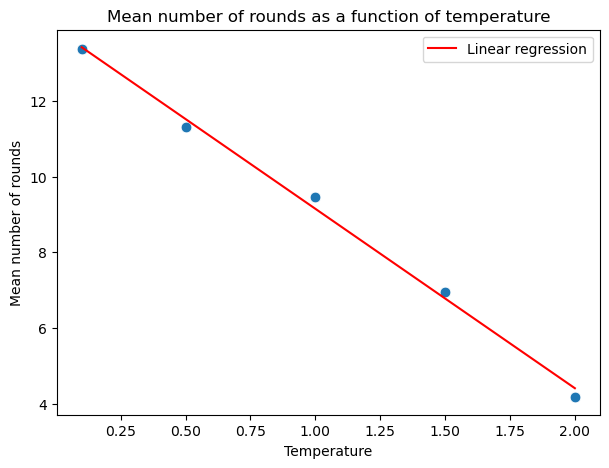

In [36]:
# Calculate mean rounds for each temperature value
grouped = df.groupby('temperature')['rounds_to_consensus'].mean().reset_index()
print(grouped)

# Linear regression: mean(rounds_to_consensus) ~ temperature
X = grouped['temperature']
y = grouped['rounds_to_consensus']

# Add constant (intercept) to the model
X_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_const).fit()

# Show the summary
print(model.summary())

# Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(x='temperature', y='rounds_to_consensus', data=grouped, s=60)
plt.plot(grouped['temperature'], model.predict(X_const), color='red', label='Linear regression')
plt.xlabel('Temperature')
plt.ylabel('Mean number of rounds')
plt.title('Mean number of rounds as a function of temperature')
plt.legend()
plt.show()

R-squared: 0.996, that's remarkably close to 1. Our hypothesis regarding linearity for temperature seems to be confirmed. Let's check for rationality as well, before doing our sobol analysis. 

   rationality  rounds_to_consensus
0         0.00             9.142857
1         0.25             8.632411
2         0.50             9.027668
3         0.75             9.256809
4         1.00             9.129555
                             OLS Regression Results                            
Dep. Variable:     rounds_to_consensus   R-squared:                       0.154
Model:                             OLS   Adj. R-squared:                 -0.128
Method:                  Least Squares   F-statistic:                    0.5466
Date:                 Sun, 29 Jun 2025   Prob (F-statistic):              0.513
Time:                         04:45:04   Log-Likelihood:                 1.0014
No. Observations:                    5   AIC:                             1.997
Df Residuals:                        3   BIC:                             1.216
Df Model:                            1                                         
Covariance Type:             nonrobust                          

C:\Users\dj\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


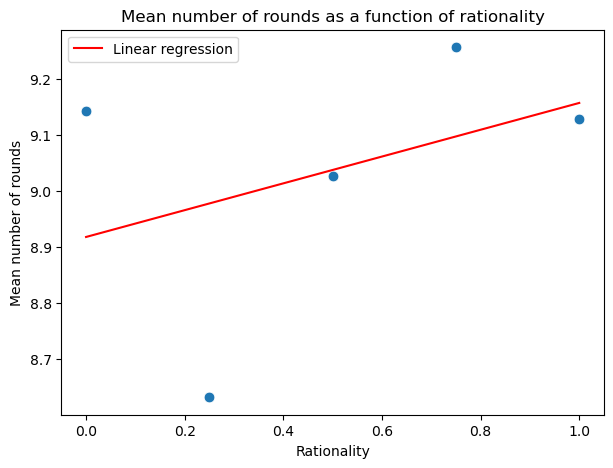

In [38]:
# Calculate the mean rounds for each rationality value
grouped = df.groupby('rationality')['rounds_to_consensus'].mean().reset_index()
print(grouped)

# Linear regression: mean(rounds_to_consensus) ~ rationality
X = grouped['rationality']
y = grouped['rounds_to_consensus']

# Add constant (intercept) to the model
X_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_const).fit()

# Show the summary
print(model.summary())

# Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(x='rationality', y='rounds_to_consensus', data=grouped, s=60)
plt.plot(grouped['rationality'], model.predict(X_const), color='red', label='Linear regression')
plt.xlabel('Rationality')
plt.ylabel('Mean number of rounds')
plt.title('Mean number of rounds as a function of rationality')
plt.legend()
plt.show()

Again,  R-squared: 0.154, is quite low, our hypothesis regarding linearity seems quite wrong for rationality. 

Therefore, we move on to SOBOL to be able to see if it's due to interactions between parameters etc for the number of rounds.  

The Sobol sensitivity analysis shows that both temperature and rationality have relatively low first-order (main) effects, with S1 values of 0.20 for temperature and 0.10 for rationality. This means that, on their own, these parameters only explain a small part of the variance in the mean number of rounds.

However, their total effects (ST) are much higher: 0.92 for temperature and 0.72 for rationality. This indicates that when accounting for both their individual and interactive (nonlinear) contributions, each parameter explains a much larger portion of the variance.

Furthermore, the second-order interaction index (S2) between temperature and rationality is 0.65, which is substantial. This high interaction value demonstrates that a large part of the variance is explained not by each parameter individually, but by the nonlinear interaction between temperature and rationality.

In summary, most of the variability in the model output is not due to the linear, isolated contributions of temperature and rationality, but rather to their combined, nonlinear effects. This highlights that capturing these interactions is crucial for understanding and predicting the behavior of the system.

C:\Users\dj\AppData\Local\Temp\ipykernel_1696\3714171953.py:31: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, N)
C:\Users\dj\anaconda3\Lib\site-packages\SALib\sample\saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (798) is equal to `2^n`.
        
  warnings.warn(msg)
C:\Users\dj\anaconda3\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                   ST   ST_conf
temperature  0.975017  0.068274
rationality  0.118307  0.014676
                   S1   S1_conf
temperature  0.876528  0.083726
rationality  0.018438  0.033568
                                  S2   S2_conf
[temperature, rationality]  0.094616  0.101021

Sobol indices (negative values are set to 0 for interpretation):
temperature: S1 = 0.8765 ± 0.0837 | ST = 0.9750 ± 0.0683
rationality: S1 = 0.0184 ± 0.0336 | ST = 0.1183 ± 0.0147


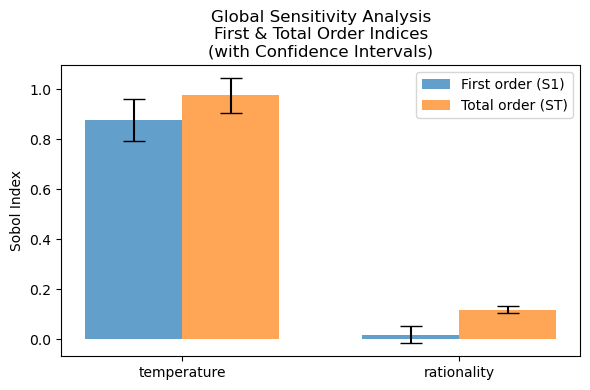

In [55]:
import pandas as pd
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot as plt

df = pd.read_csv('combined_results_snellius.csv')

# Get unique values for each parameter
temp_values = sorted(df['temperature'].unique())
rat_values = sorted(df['rationality'].unique())

# Define the SALib problem
problem = {
    'num_vars': 2,
    'names': ['temperature', 'rationality'],
    'bounds': [
        [min(temp_values), max(temp_values)],
        [min(rat_values), max(rat_values)]
    ],
}

# Generate Saltelli samples: N must be a multiple of 2*num_vars + 2 (here: 6)
N = 800
step = 2 * problem['num_vars'] + 2
N = N - (N % step)
if N % step != 0:
    print(f"Adjusted N to {N} to fit Saltelli's requirement.")

param_values = saltelli.sample(problem, N)

# Map Saltelli samples to the closest actual values in your data
def closest(x, val_list):
    return min(val_list, key=lambda v: abs(v - x))

mapped_samples = np.array([
    [closest(row[0], temp_values), closest(row[1], rat_values)]
    for row in param_values
])

# Compute model outputs (mean rounds for each parameter pair)
def get_mean_rounds(temp, rat):
    subset = df[(df['temperature'] == temp) & (df['rationality'] == rat)]
    return subset['rounds_to_consensus'].mean() if not subset.empty else np.nan

Y = np.array([get_mean_rounds(t, r) for t, r in mapped_samples])

# Remove NaNs to keep indices consistent
valid = ~np.isnan(Y)
Y_valid = Y[valid]
mapped_samples_valid = mapped_samples[valid]

expected_size = param_values.shape[0]
if Y_valid.shape[0] != expected_size:
    print(f"Warning: {expected_size - Y_valid.shape[0]} samples were removed due to missing data. Results may be less reliable.")

# Perform Sobol analysis
Si = sobol.analyze(
    problem,
    Y_valid,
    calc_second_order=True,
    print_to_console=True
)

# Print results (set negative indices to zero for clarity)
labels = problem['names']
S1 = Si['S1']
S1_conf = Si['S1_conf']
ST = Si['ST']
ST_conf = Si['ST_conf']

print("\nSobol indices (negative values are set to 0 for interpretation):")
for i, label in enumerate(labels):
    s1_nonneg = max(0, S1[i])
    st_nonneg = max(0, ST[i])
    print(f"{label}: S1 = {s1_nonneg:.4f} ± {S1_conf[i]:.4f} | ST = {st_nonneg:.4f} ± {ST_conf[i]:.4f}")

# Bar plot with confidence intervals (clip negatives to zero)
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(x - width/2, np.clip(S1, 0, 1), width, yerr=S1_conf, capsize=8, label='First order (S1)', color='C0', alpha=0.7)
rects2 = ax.bar(x + width/2, np.clip(ST, 0, 1), width, yerr=ST_conf, capsize=8, label='Total order (ST)', color='C1', alpha=0.7)

ax.set_ylabel('Sobol Index')
ax.set_title('Global Sensitivity Analysis\nFirst & Total Order Indices\n(with Confidence Intervals)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.savefig("global_sensitivity_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

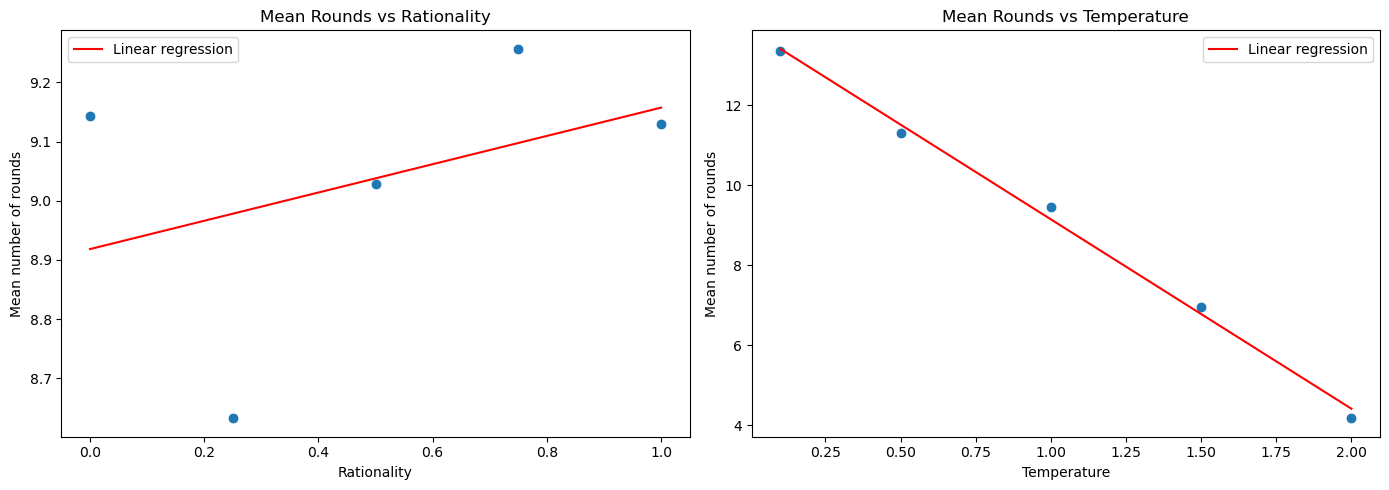

In [9]:


#Compute mean rounds by rationality
grouped_rat = df.groupby('rationality')['rounds_to_consensus'].mean().reset_index()
X_rat = grouped_rat['rationality']
y_rat = grouped_rat['rounds_to_consensus']
X_const_rat = sm.add_constant(X_rat)
model_rat = sm.OLS(y_rat, X_const_rat).fit()

#Compute mean rounds by temperature
grouped_temp = df.groupby('temperature')['rounds_to_consensus'].mean().reset_index()
X_temp = grouped_temp['temperature']
y_temp = grouped_temp['rounds_to_consensus']
X_const_temp = sm.add_constant(X_temp)
model_temp = sm.OLS(y_temp, X_const_temp).fit()

#Create the combined plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: Rationality
sns.scatterplot(x='rationality', y='rounds_to_consensus', data=grouped_rat, s=60, ax=axes[0])
axes[0].plot(grouped_rat['rationality'], model_rat.predict(X_const_rat), color='red', label='Linear regression')
axes[0].set_title('Mean Rounds vs Rationality')
axes[0].set_xlabel('Rationality')
axes[0].set_ylabel('Mean number of rounds')
axes[0].legend()

# Subplot 2: Temperature
sns.scatterplot(x='temperature', y='rounds_to_consensus', data=grouped_temp, s=60, ax=axes[1])
axes[1].plot(grouped_temp['temperature'], model_temp.predict(X_const_temp), color='red', label='Linear regression')
axes[1].set_title('Mean Rounds vs Temperature')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Mean number of rounds')
axes[1].legend()

plt.tight_layout()
plt.savefig("Régression.png")
plt.show()
